### dataset taken from https://www.kaggle.com/c/demand-forecasting-kernels-only/data

# step 1: data preprocessing and analysis

# i .preprocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import statsmodels.api as sm
# rcParams['figure.figsize'] = 15, 6# width 10 hieght 6

dataset = pd.read_csv("train.csv")#load dataset

del dataset['store']

dataset['date'] = pd.to_datetime(dataset['date'])#convert to date time object
itemno = 2#select item (1 to 50)
dffiltered = dataset[dataset['item'] == itemno]#select one item
print(dffiltered.head())
a=dffiltered.groupby(dffiltered['date'].dt.date)# sum all sold items at that dayZZZZZZZZZZZZZZZZZZZZZZCULPR
dffiltered=a.sum()#grouped or summed
print(dffiltered.head())
del dffiltered['item']
#index to date time index
dffiltered.index = pd.to_datetime(dffiltered.index)
# for example, to get the sum each day:
# df.groupby(df['date'].dt.date).sum()
train, test = np.split(dffiltered, [int(.8*len(dffiltered))])#first ko ma .8 jancha
df=train
print(df.head())
print(df.values[2])

            date  item  sales
18260 2013-01-01     2     33
18261 2013-01-02     2     43
18262 2013-01-03     2     23
18263 2013-01-04     2     18
18264 2013-01-05     2     34
            item  sales
date                   
2013-01-01    20    327
2013-01-02    20    279
2013-01-03    20    304
2013-01-04    20    359
2013-01-05    20    377
            sales
date             
2013-01-01    327
2013-01-02    279
2013-01-03    304
2013-01-04    359
2013-01-05    377
[304]


# ii. analysis

In [2]:
dfWeek=df.resample('W', how='sum')
print(dfWeek.head(5))
dfMonth=df.resample('M', how='sum')
print(dfMonth.head())
print(df.tail())

            sales
date             
2013-01-06   2067
2013-01-13   2350
2013-01-20   2427
2013-01-27   2329
2013-02-03   2414
            sales
date             
2013-01-31  10379
2013-02-28  10338
2013-03-31  13933
2013-04-30  14938
2013-05-31  17179
            sales
date             
2016-12-26    371
2016-12-27    437
2016-12-28    418
2016-12-29    490
2016-12-30    498


c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.
c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

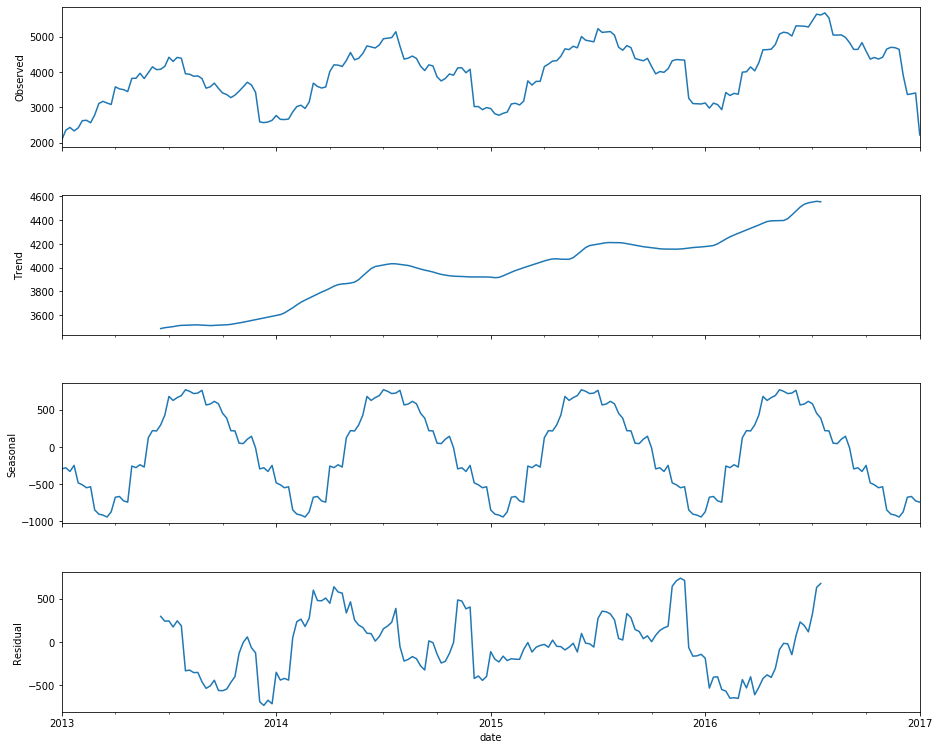

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dfWeek['sales'], model='additive', freq=48)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [4]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 20, cutoff = 0.01):
        #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)



In [5]:
#pacf acf arko library bata
def bar_plot(timeseriesData,lagNum=40):
    import statsmodels.api as sm
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(timeseriesData, lags=lagNum, ax=ax1) # 
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(timeseriesData, lags=lagNum, ax=ax2)# , lags=40

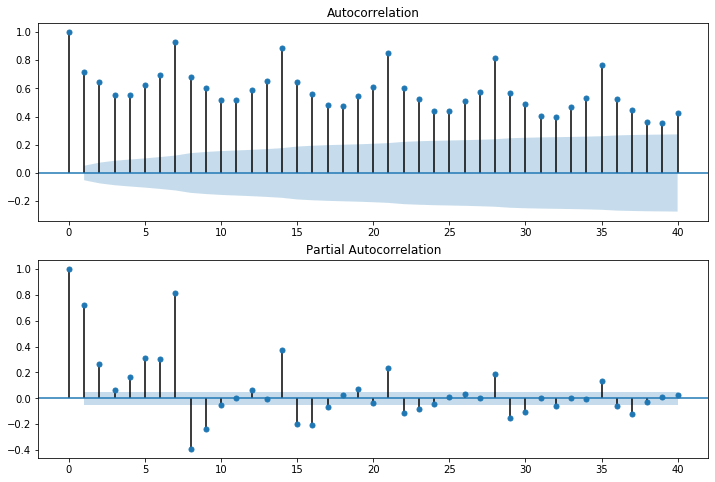

In [6]:
bar_plot(df)

# step 2 : Dickey fuller test for stationarity

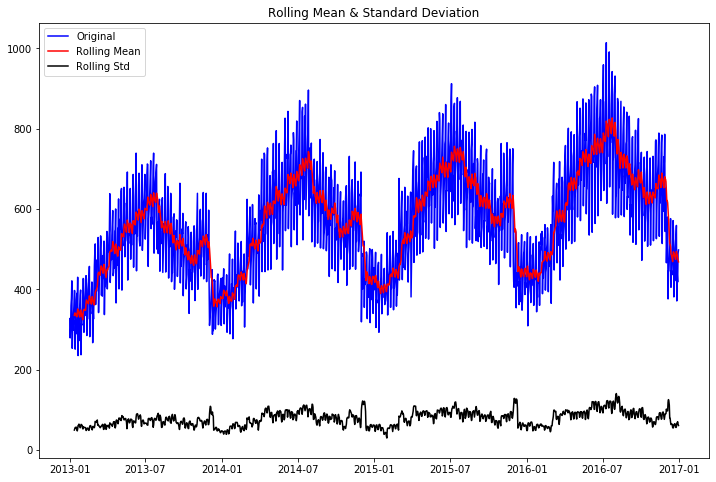

Results of Dickey-Fuller Test:
p-value = 0.1462. The series is likely non-stationary.
Test Statistic                   -2.384356
p-value                           0.146200
#Lags Used                       20.000000
Number of Observations Used    1439.000000
Critical Value (1%)              -3.434902
Critical Value (5%)              -2.863551
Critical Value (10%)             -2.567840
dtype: float64


In [7]:
test_stationarity(df.sales, window = 12)

# here P is not less than 0.05 i.e false so <br>
# Step 3: Calculate difference series

In [8]:
first_diff = df.sales - df.sales.shift(1)# right tira shift show first becomes nan
first_diff = first_diff.dropna(inplace = False)



# carry out  step 2 i.e dickey fuller test

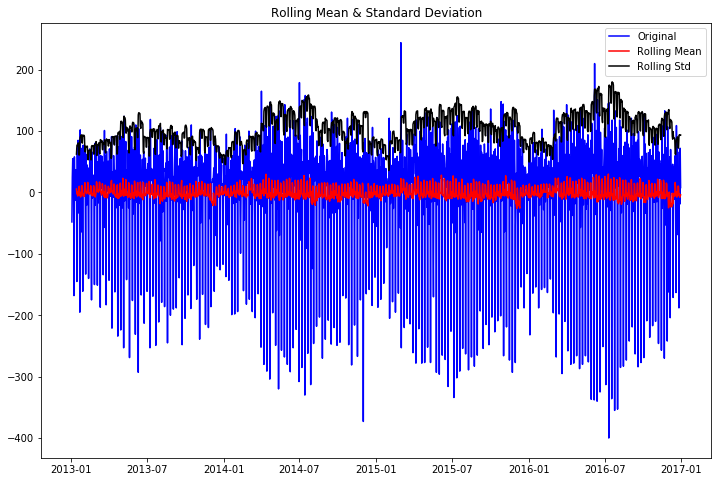

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -9.390319e+00
p-value                        6.587881e-16
#Lags Used                     2.000000e+01
Number of Observations Used    1.438000e+03
Critical Value (1%)           -3.434906e+00
Critical Value (5%)           -2.863552e+00
Critical Value (10%)          -2.567841e+00
dtype: float64


In [9]:
test_stationarity(first_diff, window = 12)

In [10]:
first_diff = pd.DataFrame({'date':first_diff.index, 'sales':first_diff.values})
print(type(first_diff))

print(first_diff)
first_diff['date'] = pd.to_datetime(first_diff['date'])
first_diff = first_diff.set_index('date') 
print(first_diff)


<class 'pandas.core.frame.DataFrame'>
           date  sales
0    2013-01-02  -48.0
1    2013-01-03   25.0
2    2013-01-04   55.0
3    2013-01-05   18.0
4    2013-01-06   44.0
5    2013-01-07 -168.0
6    2013-01-08   58.0
7    2013-01-09  -13.0
8    2013-01-10   37.0
9    2013-01-11   25.0
10   2013-01-12   37.0
11   2013-01-13   -1.0
12   2013-01-14 -145.0
13   2013-01-15   72.0
14   2013-01-16  -34.0
15   2013-01-17   85.0
16   2013-01-18   16.0
17   2013-01-19  -20.0
18   2013-01-20   60.0
19   2013-01-21 -195.0
20   2013-01-22  102.0
21   2013-01-23  -65.0
22   2013-01-24   72.0
23   2013-01-25   14.0
24   2013-01-26   27.0
25   2013-01-27   13.0
26   2013-01-28 -161.0
27   2013-01-29   77.0
28   2013-01-30   -3.0
29   2013-01-31   33.0
...         ...    ...
1429 2016-12-01 -162.0
1430 2016-12-02   45.0
1431 2016-12-03   11.0
1432 2016-12-04   58.0
1433 2016-12-05 -204.0
1434 2016-12-06   70.0
1435 2016-12-07    0.0
1436 2016-12-08   30.0
1437 2016-12-09   36.0
1438 2016-12-10   1

# Step 4: Plot ACF and PACF plots

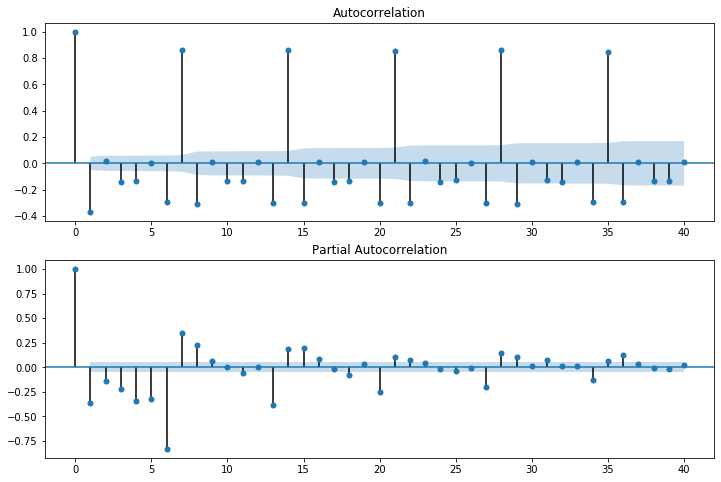

In [11]:
bar_plot(first_diff.sales)

# Step 5: Determine order of AR and MA

### From the acf and pacf plots we find that the AR order is 6 and MA order is 1.
### The series has been differenced one times so I=1

# Step 6: Fit the model

c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


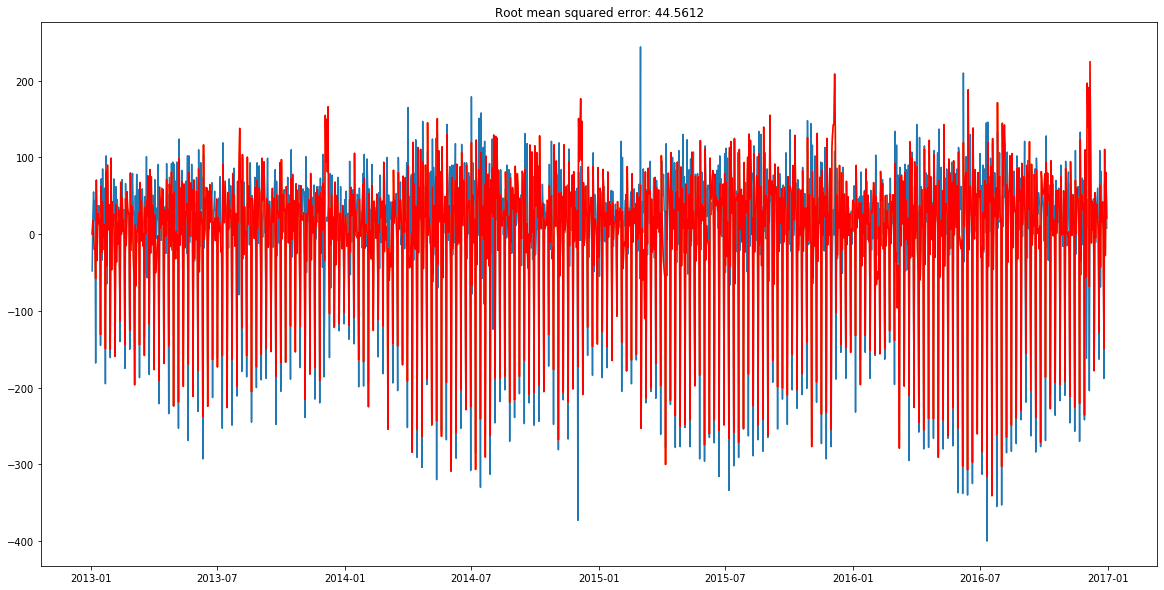

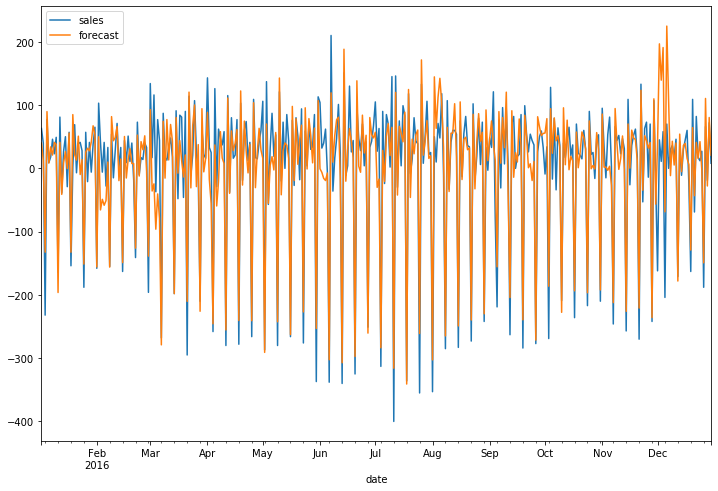

In [13]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL (p,d,q)
model = ARIMA(df, order=(6, 1, 1))  
results_ARIMA = model.fit(disp=-1)  


plt.figure(figsize=(20,10))
plt.plot(first_diff)
# print(results_AR.fittedvalues)
plt.plot(results_ARIMA.fittedvalues, color='red')
sumSquaredError = sum((results_ARIMA.fittedvalues-first_diff["sales"])**2)
meanSquaredError = sumSquaredError/len(first_diff)
rmseOfFit  = meanSquaredError**0.5
plt.title('Root mean squared error: %.4f'% rmseOfFit)
print('Plotting AR model')
first_diff['forecast'] = results_ARIMA.fittedvalues.values
# df['forecast'] = results_AR.fittedvalues

start_index = len(df)-365
end_index = len(df)-1
first_diff[start_index:end_index][['sales','forecast']].plot(figsize=(12, 8))

#RSS needs to be minimum

# Step 7: Test the model

# i. Testing the fitted values in original scale

## i. a) converting fitted values to original scale

In [14]:
#Let "xd" denote the differenced data and "x" denote the original data. 
#Then xd[n]=x[n+1]-x[n]. Therefore, x[n+1]=x[n]+xd[n]. 
#If you add the first element of first difference forecast to the real data with the same indice, then you will get the next real data forecast.
#here used xd[n] = x[n] -x[n+1] so first becomes nan
fittedOrgScale= df.copy()#data frame has values in sales
xd= results_ARIMA.fittedvalues# series has values in values
print(type(results_ARIMA.fittedvalues))

xd=pd.concat([pd.Series([0]),xd])
end=fittedOrgScale.shape[0]#for for loop in next cell
print(fittedOrgScale.values)


<class 'pandas.core.series.Series'>
[[327]
 [279]
 [304]
 ...
 [418]
 [490]
 [498]]


In [15]:
print(fittedOrgScale.values[0])
#run above to run this 
j=0
for i in fittedOrgScale.index:
    
    fittedOrgScale.values[j] = fittedOrgScale.values[j+1] + xd.values[j]
    print('adding',j,fittedOrgScale.values[j+1],'+',xd.values[j],fittedOrgScale.values[j])
    j+=1
    if j+1 ==end:
        break



[327]
adding 0 [279] + 0.0 [279]
adding 1 [304] + 0.09616406777687558 [304]
adding 2 [359] + 17.829096847512215 [376]
adding 3 [377] + -3.789684339873034 [373]
adding 4 [421] + -19.75552875385391 [401]
adding 5 [253] + -18.74159576012581 [234]
adding 6 [311] + -58.09041830446394 [252]
adding 7 [298] + 70.48359725936828 [368]
adding 8 [335] + -34.42435585748559 [300]
adding 9 [360] + 14.088924472005168 [374]
adding 10 [397] + 27.231803043128124 [424]
adding 11 [396] + 13.348387481925563 [409]
adding 12 [251] + 19.508558398540334 [270]
adding 13 [323] + -131.026142014634 [191]
adding 14 [289] + 62.8168713903474 [351]
adding 15 [374] + -23.612121522324657 [350]
adding 16 [390] + 42.130293591340376 [432]
adding 17 [370] + -4.905983251200411 [365]
adding 18 [430] + 9.69885431197837 [439]
adding 19 [235] + 12.73650553164967 [247]
adding 20 [337] + -149.38507196301637 [187]
adding 21 [272] + 82.48591371954168 [354]
adding 22 [344] + -41.461084571400534 [302]
adding 23 [358] + 90.0419493191724

adding 190 [615] + 28.04538059825074 [643]
adding 191 [654] + 14.916108755792735 [668]
adding 192 [683] + 69.00539876713847 [752]
adding 193 [720] + 38.82276873990888 [758]
adding 194 [551] + 10.424043484861876 [561]
adding 195 [580] + -225.99989293589368 [354]
adding 196 [562] + 54.182884454140904 [616]
adding 197 [634] + 6.104883432138287 [640]
adding 198 [643] + 43.54887432108032 [686]
adding 199 [706] + 22.4191308789064 [728]
adding 200 [739] + 31.939726035048345 [770]
adding 201 [490] + 10.389870728663517 [500]
adding 202 [558] + -163.73814419424318 [394]
adding 203 [582] + 78.99726300216365 [660]
adding 204 [668] + -1.2821494589524818 [666]
adding 205 [684] + 51.285876105658744 [735]
adding 206 [697] + -15.667718369317257 [681]
adding 207 [711] + 27.112674268575994 [738]
adding 208 [500] + 24.273890877759463 [524]
adding 209 [561] + -198.90213879513252 [362]
adding 210 [568] + 68.8489048889378 [636]
adding 211 [489] + 16.002401206217595 [505]
adding 212 [595] + 86.48047592158991 

adding 386 [385] + 6.368111400058856 [391]
adding 387 [414] + -2.704386399932652 [411]
adding 388 [396] + 13.475568265303266 [409]
adding 389 [475] + 26.94883179907383 [501]
adding 390 [277] + 64.7812012197619 [341]
adding 391 [381] + -166.38528423296987 [214]
adding 392 [385] + 73.51922201028282 [458]
adding 393 [404] + -18.26476260429952 [385]
adding 394 [388] + 5.8618235843659345 [393]
adding 395 [486] + 12.661217217515038 [498]
adding 396 [545] + 2.6171826532459477 [547]
adding 397 [351] + 1.882098500388885 [352]
adding 398 [410] + -225.03548238115363 [184]
adding 399 [404] + 53.53171747436627 [457]
adding 400 [436] + -24.266000279643674 [411]
adding 401 [424] + 4.80295053246099 [428]
adding 402 [515] + -32.357958277501844 [482]
adding 403 [480] + 63.58917027682229 [543]
adding 404 [381] + 20.310960498881798 [401]
adding 405 [371] + -125.44928515183821 [245]
adding 406 [406] + 43.05606917855132 [449]
adding 407 [431] + 17.207517564210463 [448]
adding 408 [464] + 29.154670532195652 

adding 581 [604] + 127.29171900090944 [731]
adding 582 [623] + 47.19188441943461 [670]
adding 583 [645] + 125.09910494547286 [770]
adding 584 [704] + -21.018044116705042 [682]
adding 585 [724] + 83.29828611051028 [807]
adding 586 [506] + 32.995810024695174 [538]
adding 587 [590] + -187.84931067866563 [402]
adding 588 [611] + 51.134654437392044 [662]
adding 589 [625] + 16.364551546610276 [641]
adding 590 [672] + 10.62905109159081 [682]
adding 591 [671] + 21.887582709465757 [692]
adding 592 [718] + 31.376986618027388 [749]
adding 593 [515] + 31.120803229300112 [546]
adding 594 [574] + -185.34996900009895 [388]
adding 595 [569] + 81.00454921774184 [650]
adding 596 [659] + 24.179480081704813 [683]
adding 597 [674] + 43.53599466732352 [717]
adding 598 [689] + 18.74701235131849 [707]
adding 599 [773] + -4.32771059999585 [768]
adding 600 [503] + 23.604551587119246 [526]
adding 601 [582] + -219.01678187673093 [362]
adding 602 [614] + 73.5158391507482 [687]
adding 603 [589] + -11.64349518746195

adding 951 [619] + -224.0466654570906 [394]
adding 952 [641] + 105.0370390787992 [746]
adding 953 [675] + -23.3415147511232 [651]
adding 954 [698] + 20.461516722391593 [718]
adding 955 [690] + 39.340259732107995 [729]
adding 956 [791] + 76.13254293256374 [867]
adding 957 [523] + 59.74377327732675 [582]
adding 958 [657] + -249.11905272341573 [407]
adding 959 [644] + 105.15685627462183 [749]
adding 960 [617] + -14.541688542063016 [602]
adding 961 [747] + 28.64525600000819 [775]
adding 962 [763] + 62.123270101022385 [825]
adding 963 [798] + -41.0598307351484 [756]
adding 964 [515] + 30.160754057319778 [545]
adding 965 [603] + -241.54141217094713 [361]
adding 966 [607] + 139.54216348387288 [746]
adding 967 [713] + 16.066653830592475 [729]
adding 968 [707] + 9.184223421238272 [716]
adding 969 [731] + 51.17662065631057 [782]
adding 970 [816] + 34.431770044146546 [850]
adding 971 [551] + 45.78463825303647 [596]
adding 972 [582] + -262.5155188223086 [319]
adding 973 [521] + 70.10380495137332 [

adding 1307 [578] + 19.713704926377233 [597]
adding 1308 [628] + -302.70641107179677 [325]
adding 1309 [638] + 144.5687671316646 [782]
adding 1310 [709] + 63.19707480763018 [772]
adding 1311 [757] + 112.57733147517621 [869]
adding 1312 [875] + 142.2980108117302 [1017]
adding 1313 [864] + 102.22008766527625 [966]
adding 1314 [579] + 31.801322330076765 [610]
adding 1315 [686] + -264.8410144313924 [421]
adding 1316 [653] + 64.78628214156257 [717]
adding 1317 [694] + -36.59308304461276 [657]
adding 1318 [754] + 55.495615214635315 [809]
adding 1319 [814] + 55.730669702296254 [869]
adding 1320 [868] + 102.13433679240208 [970]
adding 1321 [585] + 18.317285165524282 [603]
adding 1322 [660] + -249.06847359677974 [410]
adding 1323 [647] + 104.99672705575688 [751]
adding 1324 [702] + -17.69133657725849 [684]
adding 1325 [784] + 45.966132571259486 [829]
adding 1326 [820] + 49.12833921232219 [869]
adding 1327 [854] + 29.386228319308465 [883]
adding 1328 [581] + 31.949500206722558 [612]
adding 1329 

In [16]:
#convert to cumulative sum
#1st make data frame as series
#series bata cumsum
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print ('prediction arima diff',type(predictions_ARIMA_diff),predictions_ARIMA_diff.head())
#to cumsum
predictions_ARIMA_diff_cumsum = pd.Series(predictions_ARIMA_diff.cumsum())
print ('cumsum',predictions_ARIMA_diff_cumsum.head())



prediction arima diff <class 'pandas.core.series.Series'> date
2013-01-02     0.096164
2013-01-03    17.829097
2013-01-04    -3.789684
2013-01-05   -19.755529
2013-01-06   -18.741596
dtype: float64
cumsum date
2013-01-02     0.096164
2013-01-03    17.925261
2013-01-04    14.135577
2013-01-05    -5.619952
2013-01-06   -24.361548
dtype: float64


In [17]:
# df1= df.drop(df.index[0])
#dropping first value of original as fitted is from second index
df1=df.drop(df.index[0])
x1=fittedOrgScale.copy()
len(x1)


1460

# rmse of the fitted line for training data

In [18]:
error = df.sales - fittedOrgScale.values.reshape(fittedOrgScale.values.shape[0])
meanAbsoluteError = sum([abs(x) for x in error])/len(error)
squaredError = [x**2 for x in error]
meanError = sum(squaredError)/len(squaredError)
RMSE = meanError**0.5
highestScale = np.amax(dffiltered.values)
print('The Root Mean Squared Error is',RMSE,'The range of data is 0 to ',highestScale)

The Root Mean Squared Error is 118.0566180630851 The range of data is 0 to  1023


### i.b) plot original vs fitted values in original scale

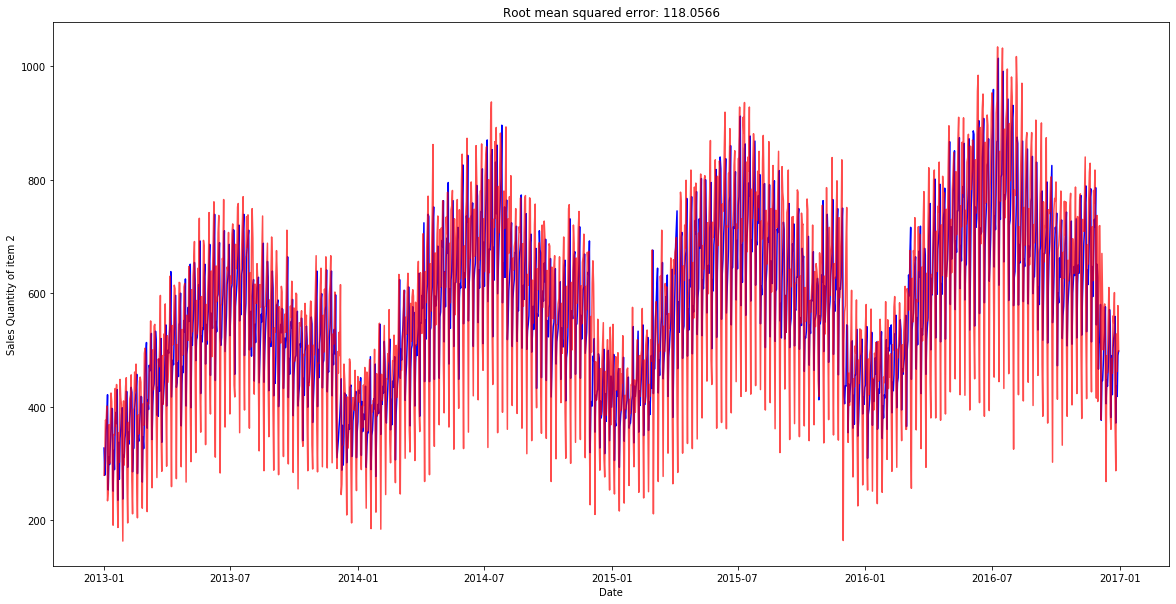

1460 1460


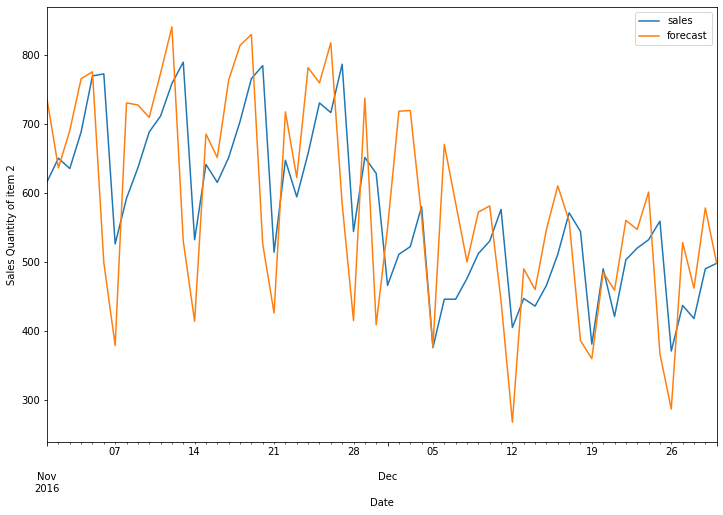

In [19]:
plt.figure(figsize=(20,10))
plt.plot(df.sales,color='blue')
plt.plot(x1,'r-', alpha=0.7)
plt.title('Root mean squared error: %.4f'% RMSE)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()
print(len(df),len(x1))
df['forecast'] = x1.values
start_index =1400
end_index =start_index+365

df[start_index:end_index][['sales','forecast']].plot(figsize=(12, 8))
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

## ii. Testing the predicted values

In [20]:
fitLen = len(results_ARIMA.fittedvalues)

lastTwo= len(results_ARIMA.fittedvalues)-2*365

c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


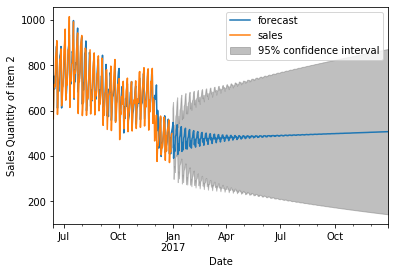

In [21]:
results_ARIMA.plot_predict(fitLen-200,fitLen+365)#start rows + end rows of forecast rows 18260+40
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


2016-12-31    524.196711
2017-01-01    547.270801
2017-01-02    390.138855
2017-01-03    446.042156
2017-01-04    419.994789
Freq: D, dtype: float64


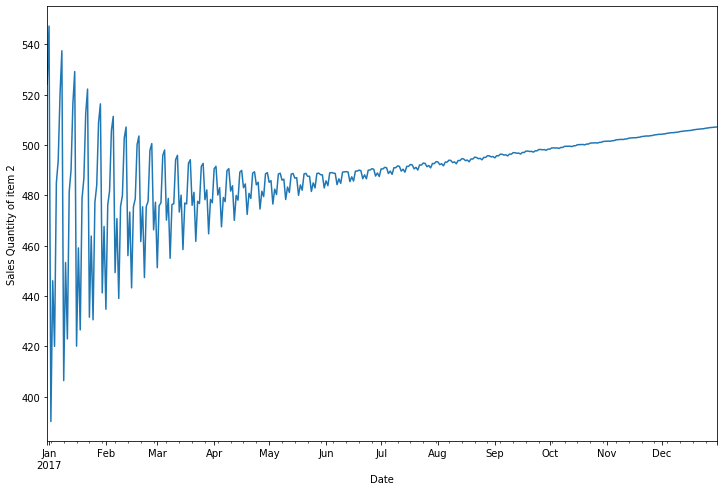

In [22]:
yearPrediction=results_ARIMA.predict(start='2016-12-31', end='2017-12-31', exog=None, typ='levels', dynamic=False) # this works
print(yearPrediction.head())

yearPrediction.plot(figsize=(12, 8))
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

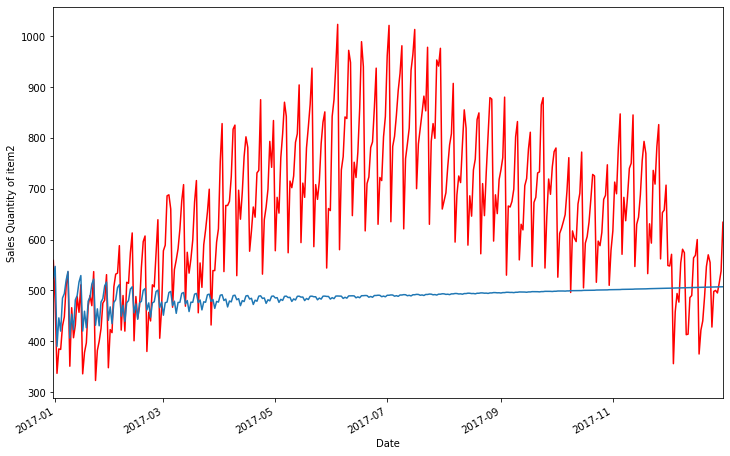

In [23]:
plt.plot(test.sales,color='red',)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item"+str(itemno))
yearPrediction.plot(figsize=(12, 8))
plt.show()

In [24]:
#yearPrediction diff = orgscale - (orgscale-interval)
#orgscale = diff + (orgscale-interval
yearPrediction=results_ARIMA.predict(start='2016-12-31', end='2017-12-31', exog=None, typ='linear', dynamic=False)
from datetime import timedelta
j=0
orgscale =yearPrediction.copy()
for i in range(len(yearPrediction.index)):
    if j<=365:
               orgscale.values[j]= yearPrediction.values[j]+dffiltered.sales[pd.to_datetime(orgscale.index[j])-timedelta(days=365)]
    j+=1
 
print(orgscale)


2016-12-31    464.196711
2017-01-01    524.074090
2017-01-02    383.868054
2017-01-03    364.903301
2017-01-04    359.952633
2017-01-05    459.992833
2017-01-06    421.785237
2017-01-07    485.513364
2017-01-08    499.166388
2017-01-09    399.911309
2017-01-10    413.919751
2017-01-11    417.660077
2017-01-12    467.445722
2017-01-13    444.627460
2017-01-14    512.349931
2017-01-15    469.833956
2017-01-16    404.860291
2017-01-17    399.047520
2017-01-18    329.428128
2017-01-19    483.340952
2017-01-20    431.887573
2017-01-21    488.818103
2017-01-22    513.658733
2017-01-23    441.338853
2017-01-24    376.236088
2017-01-25    367.711884
2017-01-26    426.670876
2017-01-27    427.822588
2017-01-28    440.006375
2017-01-29    460.330218
                 ...    
2017-12-02    511.149883
2017-12-03    522.046153
2017-12-04    580.227619
2017-12-05    376.071321
2017-12-06    446.120814
2017-12-07    446.054923
2017-12-08    476.016841
2017-12-09    512.137430
2017-12-10    530.050904


c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [25]:
#out sample 
error = orgscale.values-test.values.reshape(test.values.shape[0])
highestScale = np.amax(test.values)
meanAbsoluteError = sum([abs(x) for x in error])/len(error)
squaredError = [x**2 for x in error]
meanError = sum(squaredError)/len(squaredError)
RMSE2 = meanError**0.5
print(RMSE2,meanAbsoluteError,highestScale)


114.54565361714336 89.53924589483417 1023


The root mean squared error is  118.0566180630851


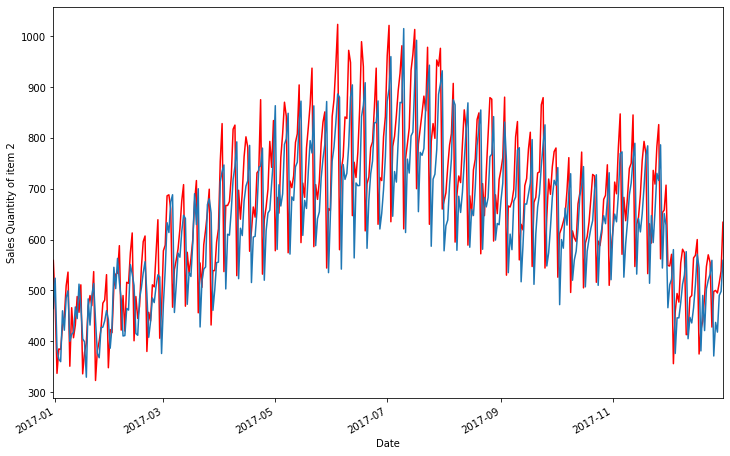

In [26]:
print("The root mean squared error is ",RMSE)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.plot(test.sales,color='red',)
orgscale.plot(figsize=(12, 8))
plt.show()

In [27]:
# print(test.head())
# print(orgscale.head())
# print(test.tail())
# print(orgscale.tail())

In [28]:

print('the Alkaike Information Criterion is ',results_ARIMA.aic)

the Alkaike Information Criterion is  15237.827147301206


# Using full dataset with parameters

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import statsmodels.api as sm
# rcParams['figure.figsize'] = 15, 6# width 10 hieght 6

dataset = pd.read_csv("train.csv")#load dataset

del dataset['store']

dataset['date'] = pd.to_datetime(dataset['date'])#convert to date time object
dffiltered = dataset[dataset['item'] == itemno]#select one item
print(dffiltered.head())
a=dffiltered.groupby(dffiltered['date'].dt.date)# sum all sold items at that dayZZZZZZZZZZZZZZZZZZZZZZCULPR
dffiltered=a.sum()#grouped or summed
print(dffiltered.head())
del dffiltered['item']
#index to date time index
dffiltered.index = pd.to_datetime(dffiltered.index)
df=dffiltered
print(df.head())
print(df.values[2])

            date  item  sales
18260 2013-01-01     2     33
18261 2013-01-02     2     43
18262 2013-01-03     2     23
18263 2013-01-04     2     18
18264 2013-01-05     2     34
            item  sales
date                   
2013-01-01    20    327
2013-01-02    20    279
2013-01-03    20    304
2013-01-04    20    359
2013-01-05    20    377
            sales
date             
2013-01-01    327
2013-01-02    279
2013-01-03    304
2013-01-04    359
2013-01-05    377
[304]


# ii. analysis

In [3]:
dfWeek=df.resample('W', how='sum')
print(dfWeek.head(5))
dfMonth=df.resample('M', how='sum')
print(dfMonth.head())
print(df.tail())

            sales
date             
2013-01-06   2067
2013-01-13   2350
2013-01-20   2427
2013-01-27   2329
2013-02-03   2414
            sales
date             
2013-01-31  10379
2013-02-28  10338
2013-03-31  13933
2013-04-30  14938
2013-05-31  17179
            sales
date             
2017-12-27    500
2017-12-28    495
2017-12-29    515
2017-12-30    538
2017-12-31    634


c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.
c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

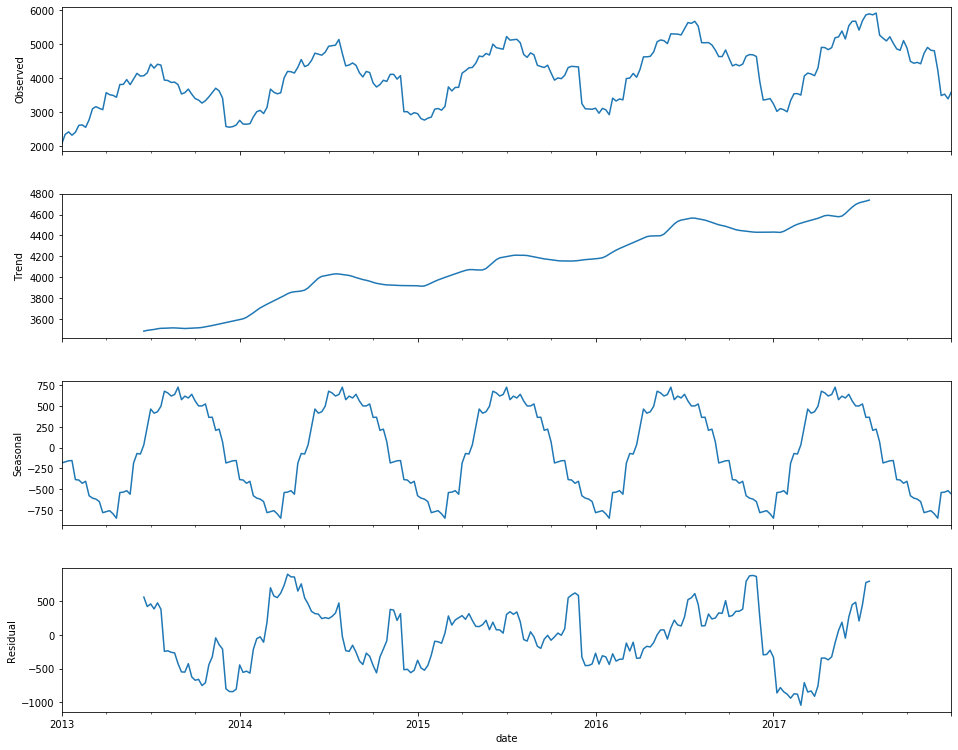

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dfWeek['sales'], model='additive', freq=48)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [5]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 20, cutoff = 0.01):
        #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)



In [6]:
#pacf acf arko library bata
def bar_plot(timeseriesData,lagNum=40):
    import statsmodels.api as sm
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(timeseriesData, lags=lagNum, ax=ax1) # 
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(timeseriesData, lags=lagNum, ax=ax2)# , lags=40

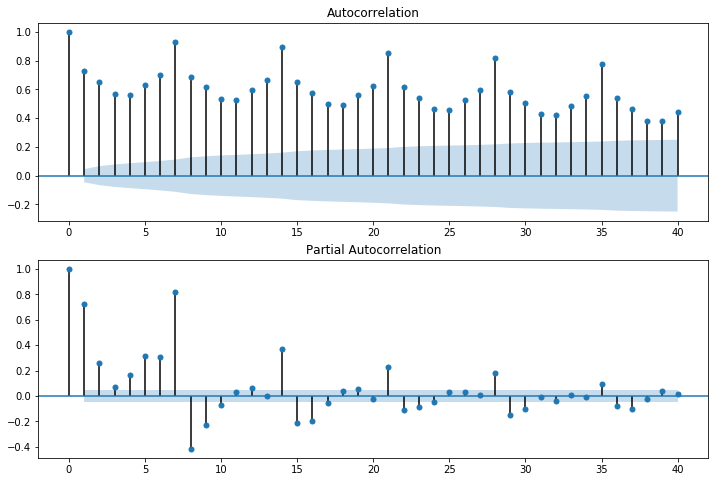

In [7]:
bar_plot(df)

# step 2 : Dickey fuller test for stationarity

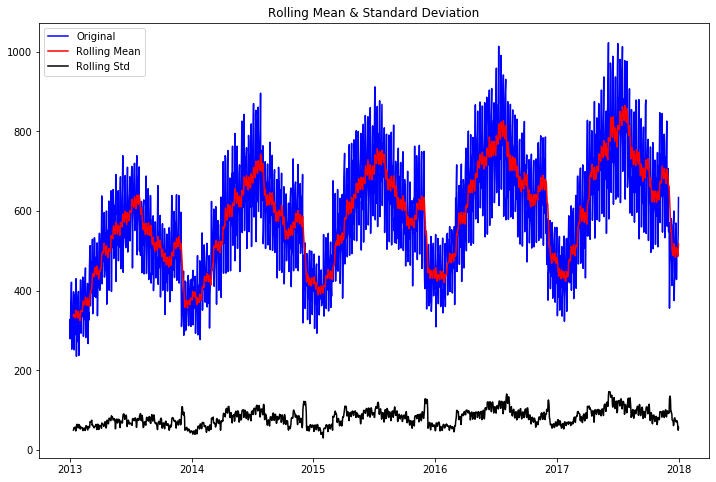

Results of Dickey-Fuller Test:
p-value = 0.0969. The series is likely non-stationary.
Test Statistic                   -2.581406
p-value                           0.096901
#Lags Used                       20.000000
Number of Observations Used    1805.000000
Critical Value (1%)              -3.433978
Critical Value (5%)              -2.863143
Critical Value (10%)             -2.567623
dtype: float64


In [8]:
test_stationarity(df.sales, window = 12)

# here P is not less than 0.05 i.e false so <br>
# Step 3: Calculate difference series

In [9]:
first_diff = df.sales - df.sales.shift(1)# right tira shift show first becomes nan
first_diff = first_diff.dropna(inplace = False)



# carry out  step 2 i.e dickey fuller test

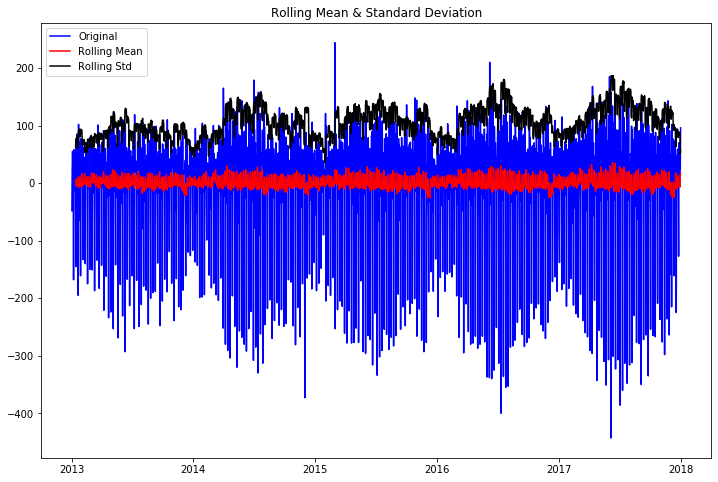

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.074125e+01
p-value                        2.814459e-19
#Lags Used                     2.000000e+01
Number of Observations Used    1.804000e+03
Critical Value (1%)           -3.433980e+00
Critical Value (5%)           -2.863143e+00
Critical Value (10%)          -2.567624e+00
dtype: float64


In [10]:
test_stationarity(first_diff, window = 12)

In [11]:
first_diff = pd.DataFrame({'date':first_diff.index, 'sales':first_diff.values})
print(type(first_diff))

print(first_diff)
first_diff['date'] = pd.to_datetime(first_diff['date'])
first_diff = first_diff.set_index('date') 
print(first_diff)


<class 'pandas.core.frame.DataFrame'>
           date  sales
0    2013-01-02  -48.0
1    2013-01-03   25.0
2    2013-01-04   55.0
3    2013-01-05   18.0
4    2013-01-06   44.0
5    2013-01-07 -168.0
6    2013-01-08   58.0
7    2013-01-09  -13.0
8    2013-01-10   37.0
9    2013-01-11   25.0
10   2013-01-12   37.0
11   2013-01-13   -1.0
12   2013-01-14 -145.0
13   2013-01-15   72.0
14   2013-01-16  -34.0
15   2013-01-17   85.0
16   2013-01-18   16.0
17   2013-01-19  -20.0
18   2013-01-20   60.0
19   2013-01-21 -195.0
20   2013-01-22  102.0
21   2013-01-23  -65.0
22   2013-01-24   72.0
23   2013-01-25   14.0
24   2013-01-26   27.0
25   2013-01-27   13.0
26   2013-01-28 -161.0
27   2013-01-29   77.0
28   2013-01-30   -3.0
29   2013-01-31   33.0
...         ...    ...
1795 2017-12-02   -1.0
1796 2017-12-03   23.0
1797 2017-12-04 -215.0
1798 2017-12-05  102.0
1799 2017-12-06   36.0
1800 2017-12-07  -17.0
1801 2017-12-08   77.0
1802 2017-12-09   27.0
1803 2017-12-10   -7.0
1804 2017-12-11 -16

# Step 4: Plot ACF and PACF plots

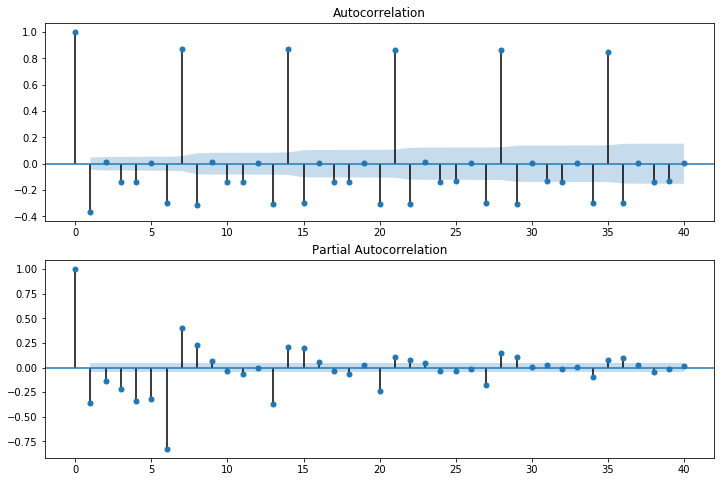

In [12]:
bar_plot(first_diff.sales)

# Step 5: Determine order of AR and MA

### From the acf and pacf plots we find that the AR order is 6 and MA order is 1.
### The series has been differenced one times so I=1

# Step 6 : Fit the model

c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


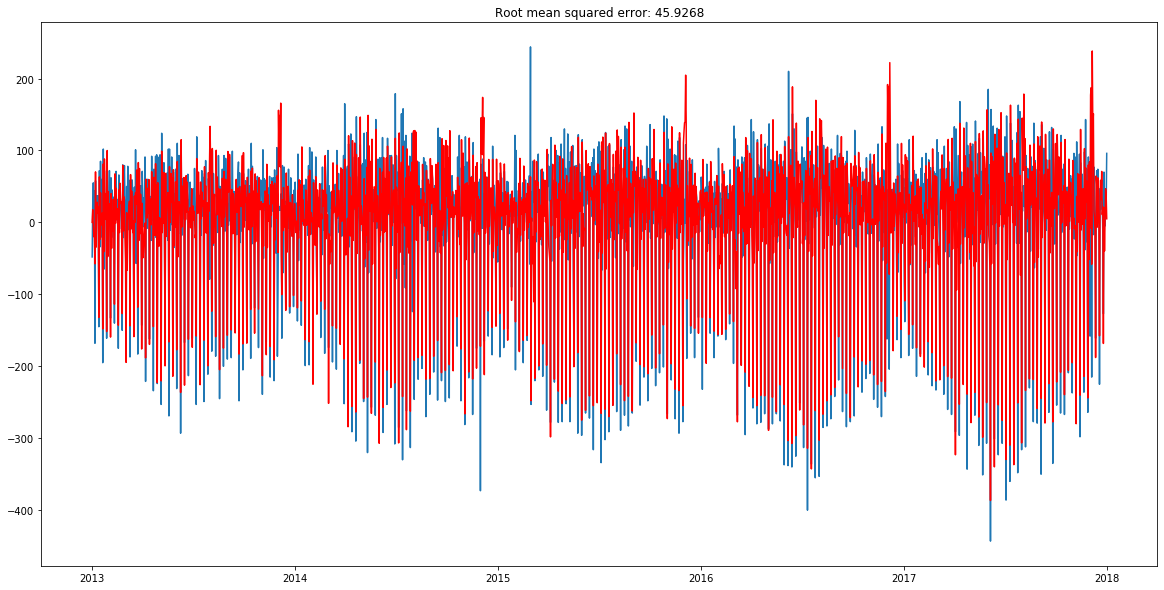

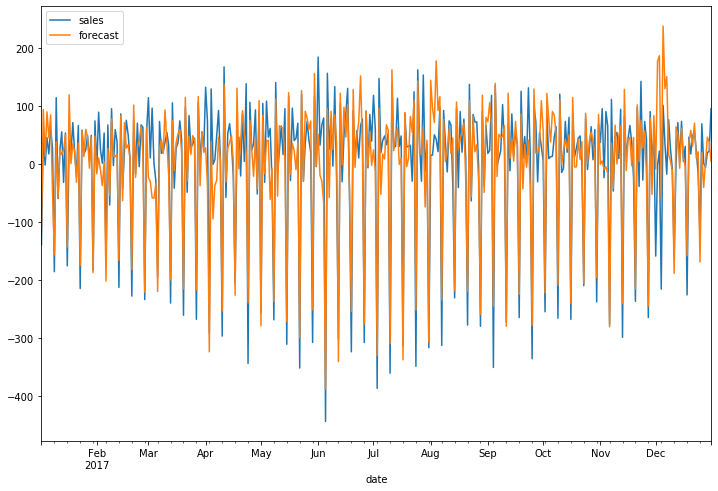

In [13]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL (p,d,q)
model = ARIMA(df, order=(6, 1, 1))  
results_ARIMA = model.fit(disp=-1)  


plt.figure(figsize=(20,10))
plt.plot(first_diff)
# print(results_AR.fittedvalues)
plt.plot(results_ARIMA.fittedvalues, color='red')
sumSquaredError = sum((results_ARIMA.fittedvalues-first_diff["sales"])**2)
meanSquaredError = sumSquaredError/len(first_diff)
rmseOfFit  = meanSquaredError**0.5
plt.title('Root mean squared error: %.4f'% rmseOfFit)
print('Plotting AR model')
first_diff['forecast'] = results_ARIMA.fittedvalues.values
# df['forecast'] = results_AR.fittedvalues

start_index = len(df)-365
end_index = len(df)-1
first_diff[start_index:end_index][['sales','forecast']].plot(figsize=(12, 8))

#RSS needs to be minimum

In [14]:
#yearPrediction diff = orgscale - (orgscale-interval)
#orgscale = diff + (orgscale-interval
yearPrediction=results_ARIMA.predict(start='2017-12-31', end='2018-12-31', exog=None, typ='linear', dynamic=False)
from datetime import timedelta
j=0
orgscale =yearPrediction.copy()
for i in range(len(yearPrediction.index)):
    if j<=365:
               orgscale.values[j]= yearPrediction.values[j]+dffiltered.sales[pd.to_datetime(orgscale.index[j])-timedelta(days=365)]
    j+=1
 
print(orgscale)


2017-12-31    564.062930
2018-01-01    313.300868
2018-01-02    374.800648
2018-01-03    374.672576
2018-01-04    380.243463
2018-01-05    450.387487
2018-01-06    468.218104
2018-01-07    589.507236
2018-01-08    401.337928
2018-01-09    387.744098
2018-01-10    447.222811
2018-01-11    404.606747
2018-01-12    451.439843
2018-01-13    505.673732
2018-01-14    524.939185
2018-01-15    399.005753
2018-01-16    370.904978
2018-01-17    353.747285
2018-01-18    395.928351
2018-01-19    486.676902
2018-01-20    505.401771
2018-01-21    527.652186
2018-01-22    443.977866
2018-01-23    355.621573
2018-01-24    354.524244
2018-01-25    400.117761
2018-01-26    440.473170
2018-01-27    488.406094
2018-01-28    530.154991
2018-01-29    453.833352
                 ...    
2018-12-02    548.000059
2018-12-03    571.156181
2018-12-04    356.155136
2018-12-05    458.060282
2018-12-06    494.212948
2018-12-07    476.962183
2018-12-08    554.186168
2018-12-09    581.007962
2018-12-10    574.152005


c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


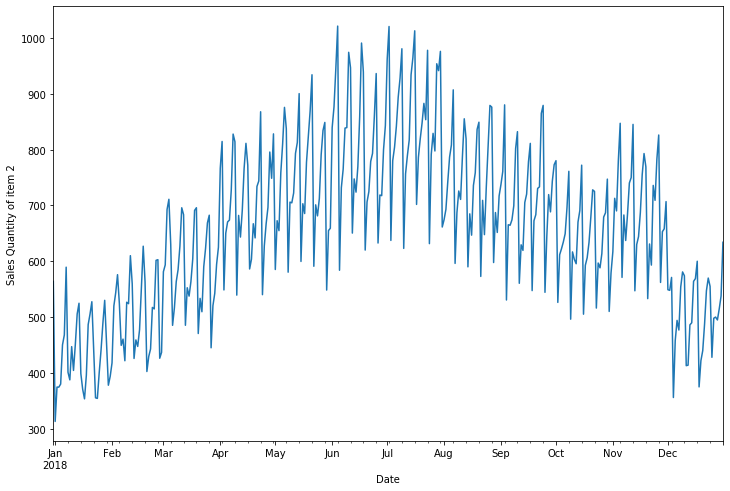

In [15]:
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
orgscale.plot(figsize=(12, 8))
plt.show()

In [16]:
# print(test.head())
# print(orgscale.head())
# print(test.tail())
# print(orgscale.tail())

In [17]:

print('the Alkaike Information Criterion is ',results_ARIMA.aic)

the Alkaike Information Criterion is  19166.49299791518


# EXPORTING AS JSON

In [18]:
dft= pd.DataFrame({'date':orgscale.index, 'sales quantity':orgscale.values})

dft['date'] = pd.to_datetime(dft['date'])#convert to date time object
dft['item'] = itemno
print(dft.tail())

          date  sales quantity  item
361 2018-12-27      500.175972     2
362 2018-12-28      495.014558     2
363 2018-12-29      515.162758     2
364 2018-12-30      538.030566     2
365 2018-12-31      634.140705     2


In [19]:
export=dft.to_json(orient='records',date_format='iso')

In [20]:
print(export)
dft.to_json(path_or_buf=r'C:\Users\Acer\Desktop\current\minor\arimaFinal\predicted{}.json'.format(itemno),orient='records',date_format='iso')

[{"date":"2017-12-31T00:00:00.000Z","sales quantity":564.0629297704,"item":2},{"date":"2018-01-01T00:00:00.000Z","sales quantity":313.3008677831,"item":2},{"date":"2018-01-02T00:00:00.000Z","sales quantity":374.8006480912,"item":2},{"date":"2018-01-03T00:00:00.000Z","sales quantity":374.6725762835,"item":2},{"date":"2018-01-04T00:00:00.000Z","sales quantity":380.2434626862,"item":2},{"date":"2018-01-05T00:00:00.000Z","sales quantity":450.3874866598,"item":2},{"date":"2018-01-06T00:00:00.000Z","sales quantity":468.218104475,"item":2},{"date":"2018-01-07T00:00:00.000Z","sales quantity":589.5072363491,"item":2},{"date":"2018-01-08T00:00:00.000Z","sales quantity":401.3379277257,"item":2},{"date":"2018-01-09T00:00:00.000Z","sales quantity":387.7440976494,"item":2},{"date":"2018-01-10T00:00:00.000Z","sales quantity":447.2228112501,"item":2},{"date":"2018-01-11T00:00:00.000Z","sales quantity":404.6067469206,"item":2},{"date":"2018-01-12T00:00:00.000Z","sales quantity":451.4398428575,"item":2}